<a href="https://colab.research.google.com/github/mazzidougs/Bitcoin-analysis-with-Meta-Prophet/blob/main/Bitcoin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bitcoin Historical Data

#### Importing dataset with Kaggle API



In [15]:
#to import the data, we must import Kaggle.json to use the Kaggle API.
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download mczielinski/bitcoin-historical-data
!unzip bitcoin-historical-data.zip

!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists
 98% 98.0M/100M [00:04<00:00, 27.9MB/s]
100% 100M/100M [00:04<00:00, 21.6MB/s] 
Archive:  bitcoin-historical-data.zip
  inflating: bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv  
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from matplotlib import pyplot

In [17]:
df = pd.read_csv("bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv")

In [18]:
df.Timestamp.value_counts().sum()

4857377

In [19]:
df.head(None)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


In [20]:
df.describe()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,4.857377e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06
mean,1.471301e+09,6.009024e+03,6.013357e+03,6.004488e+03,6.009014e+03,9.323249e+00,4.176284e+04,6.008935e+03
std,8.428019e+07,8.996247e+03,9.003521e+03,8.988778e+03,8.996360e+03,3.054989e+01,1.518248e+05,8.995992e+03
min,1.325318e+09,3.800000e+00,3.800000e+00,1.500000e+00,1.500000e+00,0.000000e+00,0.000000e+00,3.800000e+00
25%,1.398179e+09,4.438600e+02,4.440000e+02,4.435200e+02,4.438600e+02,4.097759e-01,4.521422e+02,4.438306e+02
50%,1.471428e+09,3.596970e+03,3.598190e+03,3.595620e+03,3.597000e+03,1.979811e+00,3.810124e+03,3.596804e+03
75%,1.544288e+09,8.627270e+03,8.632980e+03,8.621090e+03,8.627160e+03,7.278216e+00,2.569821e+04,8.627637e+03
max,1.617149e+09,6.176356e+04,6.178183e+04,6.167355e+04,6.178180e+04,5.853852e+03,1.390067e+07,6.171621e+04


In [21]:
df.isnull().sum()

Timestamp                  0
Open                 1243608
High                 1243608
Low                  1243608
Close                1243608
Volume_(BTC)         1243608
Volume_(Currency)    1243608
Weighted_Price       1243608
dtype: int64

Text(0.5, 0, 'Time')

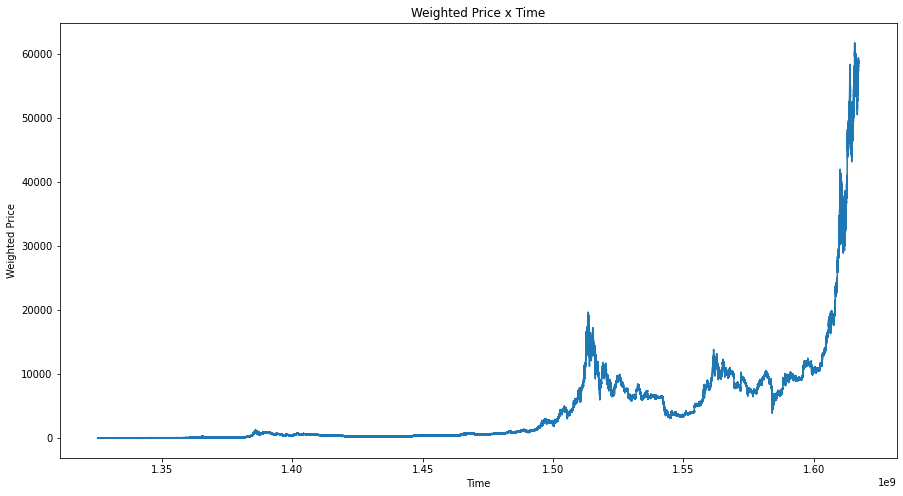

In [22]:
fig, ax = plt.subplots(figsize=(15,8))
x = df.Timestamp
y = df.Weighted_Price

ax.plot(x, y)
ax.set_title("Weighted Price x Time")
ax.set_ylabel("Weighted Price")
ax.set_xlabel("Time")

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

####Transformação de date para datatime para a utilização do Prophet

In [24]:
df_prophet = df.copy()

#rename columns
df_prophet = df.rename(columns={'Weighted_Price':'y'})

#check
df_prophet.columns

ds = pd.to_datetime(df_prophet['Timestamp'],unit='s')

df_prophet.insert(0, 'ds', ds)

#removing every column instead ds and y for prophet implementation
df_prophet.drop(['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume_(BTC)','Volume_(Currency)'], axis=1, inplace=True)

df_prophet.head()

,ds,y
0,2011-12-31 07:52:00,4.39
1,2011-12-31 07:53:00,NaN
2,2011-12-31 07:54:00,NaN
3,2011-12-31 07:55:00,NaN
4,2011-12-31 07:56:00,NaN


Como os valores NaN indicam que não possuímos variações nos valores, iremos remove-los.

In [25]:
df_prophet = df_prophet.dropna()
df_prophet.isnull().sum()

ds    0
y     0
dtype: int64

In [26]:
df_prophet.value_counts().sum()

3613769

In [27]:
df_filtered = df_prophet.loc[pd.to_datetime(df_prophet.ds).dt.minute.eq(0)]
df_filtered.value_counts().sum()

63024

In [28]:
df_filtered.head(None)

,ds,y
548,2011-12-31 17:00:00,4.580000
6248,2012-01-04 16:00:00,5.360462
9248,2012-01-06 18:00:00,6.400000
13448,2012-01-09 16:00:00,6.600000
14528,2012-01-10 10:00:00,6.240000
...,...,...
4857136,2021-03-30 20:00:00,59090.651748
4857196,2021-03-30 21:00:00,58620.228970
4857256,2021-03-30 22:00:00,58762.179612
4857316,2021-03-30 23:00:00,58648.607194


Text(0.5, 0, 'ds')

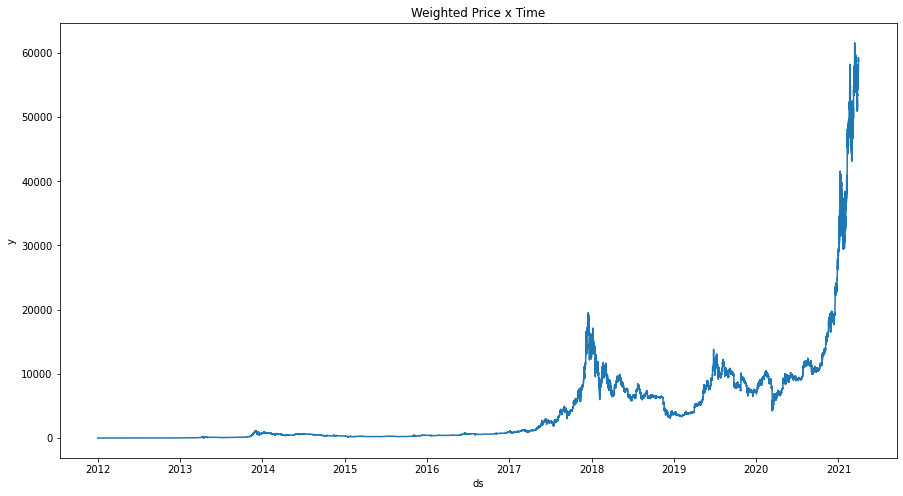

In [29]:
fig, ax = plt.subplots(figsize=(15,8))
x = df_filtered.ds
y = df_filtered.y

ax.plot(x, y)
ax.set_title("Weighted Price x Time")
ax.set_ylabel("y")
ax.set_xlabel("ds")

In [30]:
df_diff = df_prophet.y.diff().diff()

In [31]:
m = Prophet()
m.fit(df_filtered)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp55mj6pxx/3l5q9cmx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp55mj6pxx/j12hetfh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33861', 'data', 'file=/tmp/tmp55mj6pxx/3l5q9cmx.json', 'init=/tmp/tmp55mj6pxx/j12hetfh.json', 'output', 'file=/tmp/tmp55mj6pxx/prophet_model763bbrkt/prophet_model-20230125195509.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:55:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:57:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [32]:
df_diff[0]

df_prophet = df.rename(columns={'Weighted_Price':'y'})


In [33]:
df_diff.dtypes

dtype('float64')

In [34]:
future = m.make_future_dataframe(periods=800)
future.tail()

,ds
63819,2023-06-05
63820,2023-06-06
63821,2023-06-07
63822,2023-06-08
63823,2023-06-09


In [35]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
63819,2023-06-05,79878.878499,-119418.163306,280586.351912
63820,2023-06-06,79871.349261,-117874.517112,282760.058981
63821,2023-06-07,79837.266878,-116742.012489,282829.208029
63822,2023-06-08,79834.689337,-119119.507525,284419.744429
63823,2023-06-09,79796.145195,-121167.736657,282769.935042


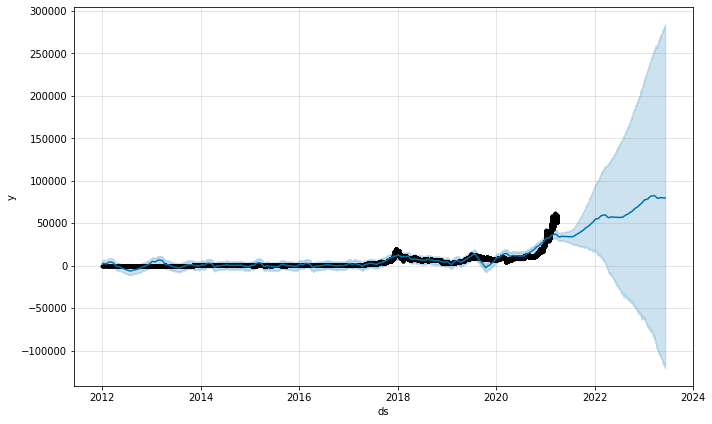

In [36]:
fig1 = m.plot(forecast)

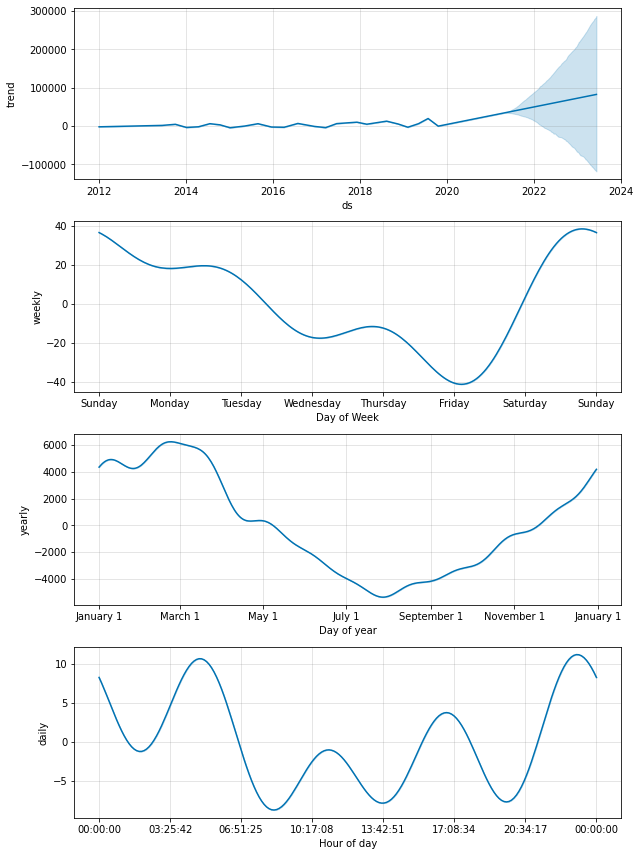

In [37]:
fig2 = m.plot_components(forecast)

In [38]:
df_plot = df.copy()

#rename columns
df_plot = df.rename(columns={'Weighted_Price':'y'})

#check
df_plot.columns

ds = pd.to_datetime(df_plot['Timestamp'],unit='s')

df_plot.insert(0, 'ds', ds)

#removing every column instead ds and y for prophet implementation
df_plot.drop(['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume_(BTC)','Volume_(Currency)'], axis=1, inplace=True)

df_plot.head()

,ds,y
0,2011-12-31 07:52:00,4.39
1,2011-12-31 07:53:00,NaN
2,2011-12-31 07:54:00,NaN
3,2011-12-31 07:55:00,NaN
4,2011-12-31 07:56:00,NaN


####Ascensão e declínio da primeira e segunda derivada

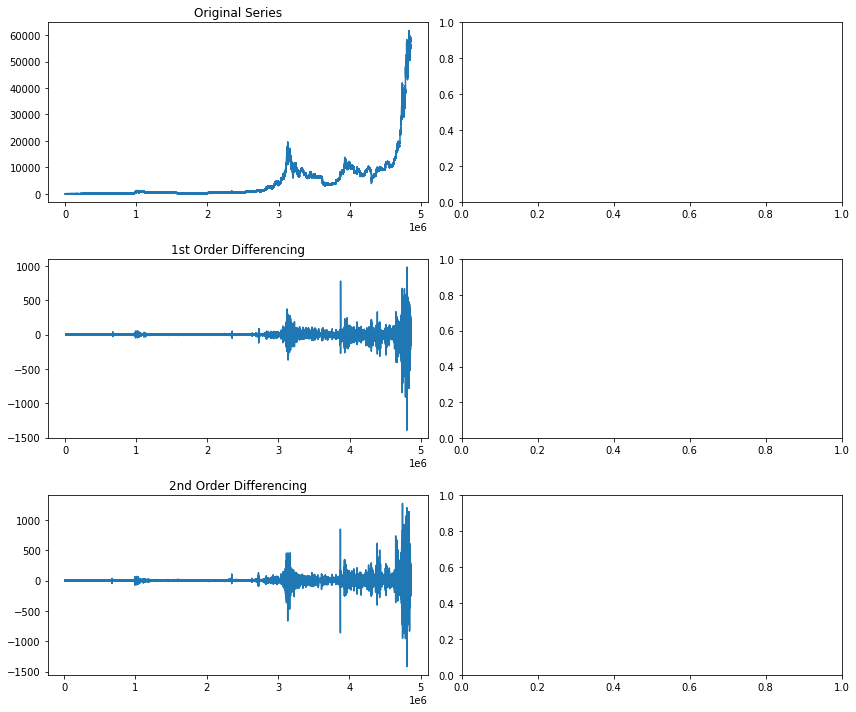

In [56]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# read the data from the file, parse the dates and set as index
#df = pd.read_csv('file.csv', index_col=[0], parse_dates=[0])

# Original Series
fig, axes = plt.subplots(3, 2, figsize=(12, 10))
axes[0, 0].plot(df_prophet.y)
axes[0, 0].set_title('Original Series')
#plot_acf(df_prophet.y, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df_prophet.y.diff())
axes[1, 0].set_title('1st Order Differencing')
#plot_acf(df_prophet.y.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df_prophet.y.diff().diff())
axes[2, 0].set_title('2nd Order Differencing')
#plot_acf(df_prophet.y.diff().diff().dropna(), ax=axes[2, 1])

fig.tight_layout()
plt.show()

In [73]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()

INFO:prophet:Making 13 forecasts with cutoffs between 2014-05-02 00:00:00 and 2020-03-31 00:00:00


  0%|          | 0/13 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp55mj6pxx/11rv5pb0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp55mj6pxx/z1po7up7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76768', 'data', 'file=/tmp/tmp55mj6pxx/11rv5pb0.json', 'init=/tmp/tmp55mj6pxx/z1po7up7.json', 'output', 'file=/tmp/tmp55mj6pxx/prophet_modellns495jn/prophet_model-20230125233412.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:34:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:34:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp55mj6pxx/p5pyk2z4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp55mj6pxx/6hegut8u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2014-05-02 01:00:00,427.359711,375.228188,483.821171,461.900000,2014-05-02
1,2014-05-02 02:00:00,426.723867,376.164857,477.972883,459.659698,2014-05-02
2,2014-05-02 03:00:00,426.534715,374.176367,480.229687,461.260000,2014-05-02
3,2014-05-02 04:00:00,426.395763,373.237490,478.503570,459.089997,2014-05-02
4,2014-05-02 06:00:00,425.183168,373.244080,479.000774,451.737184,2014-05-02


In [74]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)


In [75]:
df_p.head(None)

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,37 days 04:00:00,1.738673e+06,1318.587600,873.750015,0.227920,0.211672,0.247688,0.341170
1,37 days 05:00:00,1.741438e+06,1319.635432,874.492929,0.228082,0.211746,0.247887,0.340978
2,37 days 06:00:00,1.743785e+06,1320.524655,875.021856,0.228224,0.211768,0.248066,0.341032
3,37 days 07:00:00,1.746117e+06,1321.407279,875.536548,0.228358,0.211843,0.248237,0.341085
4,37 days 08:00:00,1.748133e+06,1322.169778,875.905075,0.228462,0.211810,0.248376,0.341219
...,...,...,...,...,...,...,...,...
7864,364 days 20:00:00,1.677957e+08,12953.598226,6818.486521,1.291628,0.765227,1.115805,0.742866
7865,364 days 21:00:00,1.677424e+08,12951.539787,6815.965518,1.291767,0.765224,1.115925,0.742957
7866,364 days 22:00:00,1.678105e+08,12954.169825,6817.708400,1.291482,0.765224,1.115903,0.742883
7867,364 days 23:00:00,1.677809e+08,12953.027255,6816.134064,1.291520,0.765191,1.115929,0.742934


/usr/local/lib/python3.8/dist-packages/prophet/plot.py:544: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.8/dist-packages/prophet/plot.py:545: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


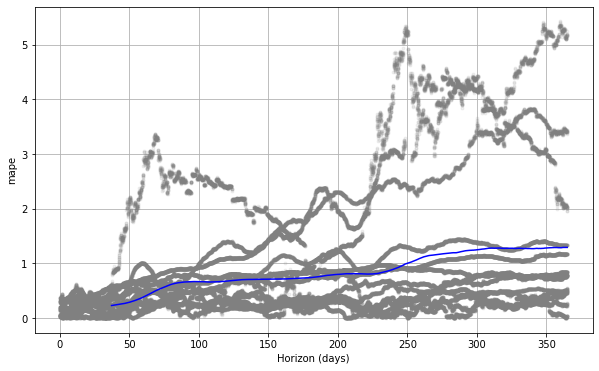

In [78]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

####Em resumo foi possível analisar dados históricos de valores de fechamentos e aberturas dos preços de bitcoin com série temporal (utilizado em stocks). Também foi feita uma predição utilizado o modelo Prophet da Meta para predição em séries temporais. Como esta criptomoeda é muito volátil, foi obtida uma predição de no máximo de 30 000 dólares e uma amálise de 8,000 dólares de bitcoin para 2024. Com as métricas de validação, não foi interessante pela alta variação no ativo.